### Nanocomp - 2025.02 - Prof. Omar
---
<p> 
Optimizing quantum wells for quantum bragg mirror detectors via genetic algorithms(NSGA-II).
</p>

- Marco Túlio Mata
- 
-

---

#### 1. _AUTOMATED RUN_

In [2]:
import include.run_prog as prog

ex1 = [5, 2e-9, 7e-9, 2e-9, 1, 2e-9, 7e-9]
param = ex1
if(len(param) != 7):
    raise ValueError("Parameter list must have exactly 7 elements.")
out_dir = prog.run_qbmd(param[0], param[1], param[2], param[3], param[4], param[5], param[6], create_param_folder=True)
print("Outputs in:", out_dir)

Running command: ['/home/mark/nano.compQBMD/linux_executable/fortran_files/prog', '5', '2.000d0', '7.000d0', '2.000d0', '1', '2.000d0', '7.000d0', '/home/mark/nano.compQBMD/linux_executable/fortran_files/05x2.0_7.0__2.0__01x2.0_7.0/']
Outputs in: /home/mark/nano.compQBMD/linux_executable/fortran_files/05x2.0_7.0__2.0__01x2.0_7.0


#### 2. _VISUALIZATION_

────────────────────────────────────────────────────────────
Files in /home/mark/nano.compQBMD/linux_executable/fortran_files/05x2.0_7.0__2.0__01x2.0_7.0
────────────────────────────────────────────────────────────
Energy_SL                 : True
FimPrograma               : True
OscStr_SL                 : True
Photocurrent_SL           : True
Transmission_SL           : True
Potencial_SL              : True
Wavefunction_SL           : True

────────────────────────────────────────────────────────────
FimPrograma.txt value
────────────────────────────────────────────────────────────
raw                       : 7.6003330000000000
as_float                  : 7.600333

────────────────────────────────────────────────────────────
Energy_SL.txt summary
────────────────────────────────────────────────────────────
num_points                : 45
min (eV?)                 : 284.5690032357867
max (eV?)                 : 696.2440392029428
mean                      : 534.8775760989406
median     

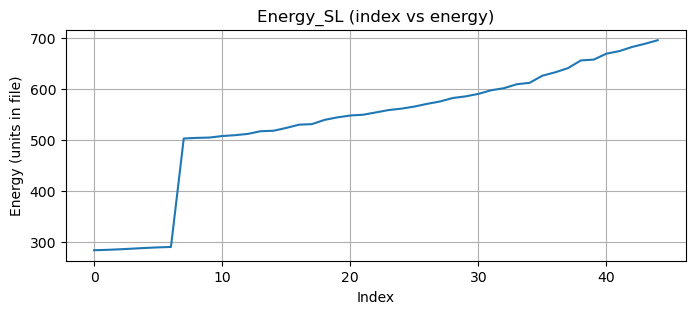

────────────────────────────────────────────────────────────
Photocurrent_SL metrics
────────────────────────────────────────────────────────────
num_peaks                 : 2
peak_energy               : 321.8000200798737
peak_value                : 1.637427097657734e-09
peak_area                 : 9.16040223833341e-09
total_abs_area            : 3.1237610001520265e-08
prominence_ratio          : 0.29324913903104605
Q_factor                  : 51.90322580645155
secondary_peaks_ratio     : 0.10576995843303558
integrated_QE             : 2.1158387617754156e-08



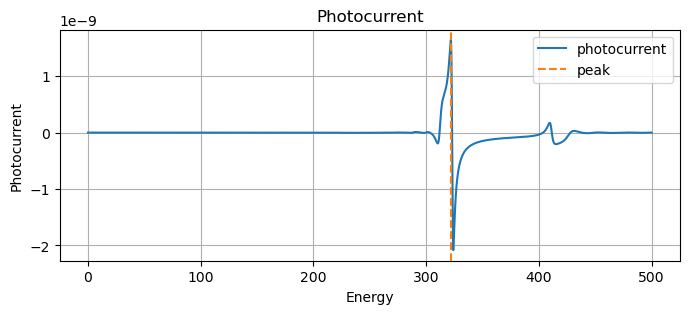

────────────────────────────────────────────────────────────
OscStr_SL.txt summary
────────────────────────────────────────────────────────────
shape                     : (44, 2)
x min/max                 : (0.7192575011907427, 411.67503596715613)
y min/max                 : (1.1592213326095649e-06, 0.42456767907002646)



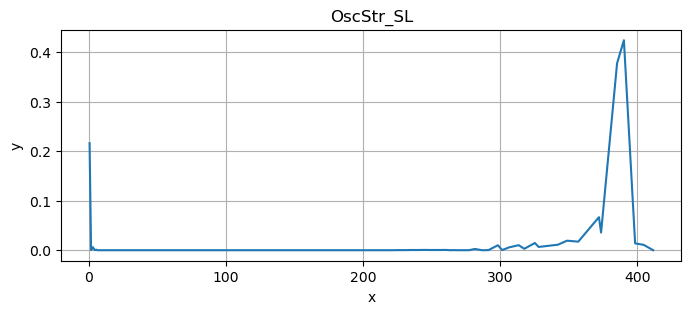

────────────────────────────────────────────────────────────
Transmission_SL.txt summary
────────────────────────────────────────────────────────────
shape                     : (4999, 2)
x min/max                 : (0.10000000623986131, 499.90003119306675)
y min/max                 : (3.32013405e-22, 1.0)



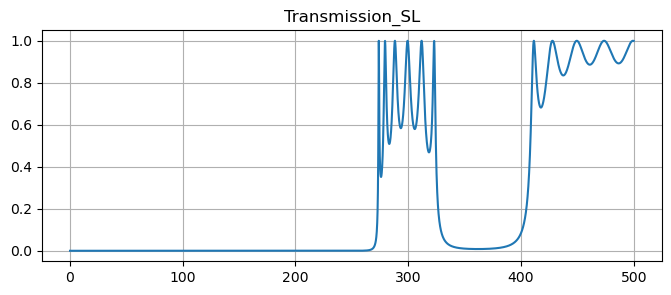

────────────────────────────────────────────────────────────
Potencial_SL.txt summary
────────────────────────────────────────────────────────────
shape                     : (1921, 2)
x min/max                 : (-95.0, 97.00000286102295)
y min/max                 : (0.0, 503.0)



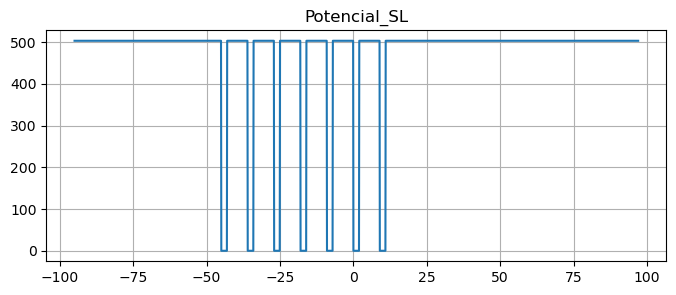

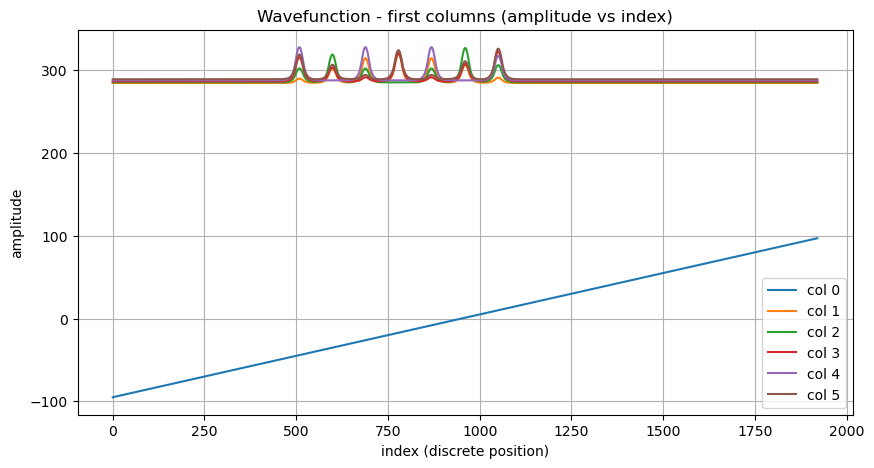

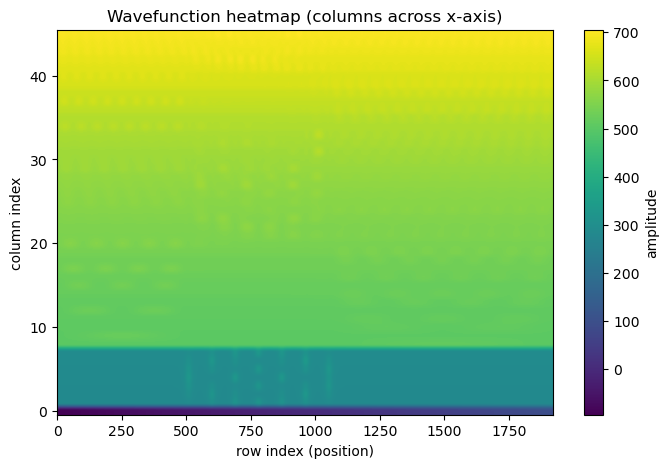

In [3]:
import include.visualize as viz
#out_dir = "/home/mark/nano.compQBMD/linux_executable/fortran_files/05x2.0_7.0__2.0__01x2.0_7.0/"
res = viz.visualize_all(out_dir, show=True)

#### 2. _GENETIC ALGORITHM_

In [ ]:
import sys
from include.run_opt import run_optimization as run_ga

if __name__ == "__main__":
    try:
        print("Iniciando otimização GA multi-objetivo...")
        results = run_ga()
        print("\n Otimização concluída com sucesso!")
        sys.exit(0)
    except KeyboardInterrupt:
        print("\n  Otimização interrompida pelo usuário")
        sys.exit(1)
    except Exception as e:
        print(f"\n Erro durante a otimização: {e}")
        import traceback
        traceback.print_exc()
        sys.exit(1)
